# 0) Setup

In [1]:
# !pip install yfinance -q
# !pip install pandas -q
# !pip install matplotlib -q
# !pip install scikit-learn -q
# !pip install statsmodels -q
# !pip install tensorflow -q
# !pip install fbprophet -q
# !pip install prophet -q
# !pip install statsmodels -q

In [2]:
# Filtering out Warnings from output
import warnings
warnings.simplefilter("ignore")

# 1) Data Fetching

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf

# Fetch Bitcoin data
btc_data = yf.download('BTC-USD', start='2014-10-01', end='2024-05-31')
btc_data.to_excel("Fetched_BTC_Data_V1.xlsx")
btc_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400
2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700
2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200
2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500
2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096


In [4]:
print("Number of Records: ", btc_data.shape[0])
btc_data.info()

Number of Records:  3530
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3530 entries, 2014-10-01 to 2024-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3530 non-null   float64
 1   High       3530 non-null   float64
 2   Low        3530 non-null   float64
 3   Close      3530 non-null   float64
 4   Adj Close  3530 non-null   float64
 5   Volume     3530 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 193.0 KB


# 2) Data Exploration

In [5]:
# Summary statistics
summary_stats = btc_data.describe()
print("\nSummary Statistics:")
summary_stats


Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume
count,3530.000000,3530.000000,3530.000000,3530.000000,3530.000000,3.530000e+03
mean,16492.625734,16875.873639,16084.209126,16510.644143,16510.644143,1.731341e+10
std,18262.535148,18693.149269,17790.663183,18279.073077,18279.073077,1.924282e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1057.099976,1089.672485,1040.527496,1061.779968,1061.779968,2.532700e+08
50%,8810.702637,8996.875000,8619.237793,8807.636719,8807.636719,1.319026e+10
75%,27266.747070,27790.822754,26836.931641,27292.176758,27292.176758,2.788738e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


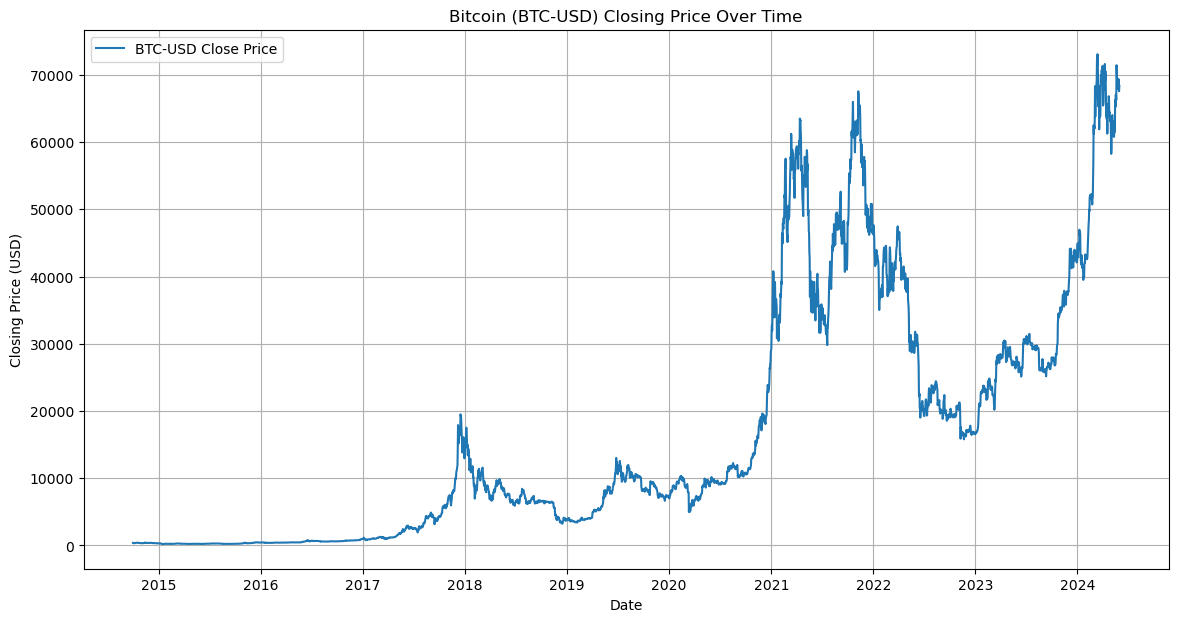

In [6]:
import matplotlib.pyplot as plt

# Plotting the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC-USD Close Price')
plt.title('Bitcoin (BTC-USD) Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid()
plt.show()

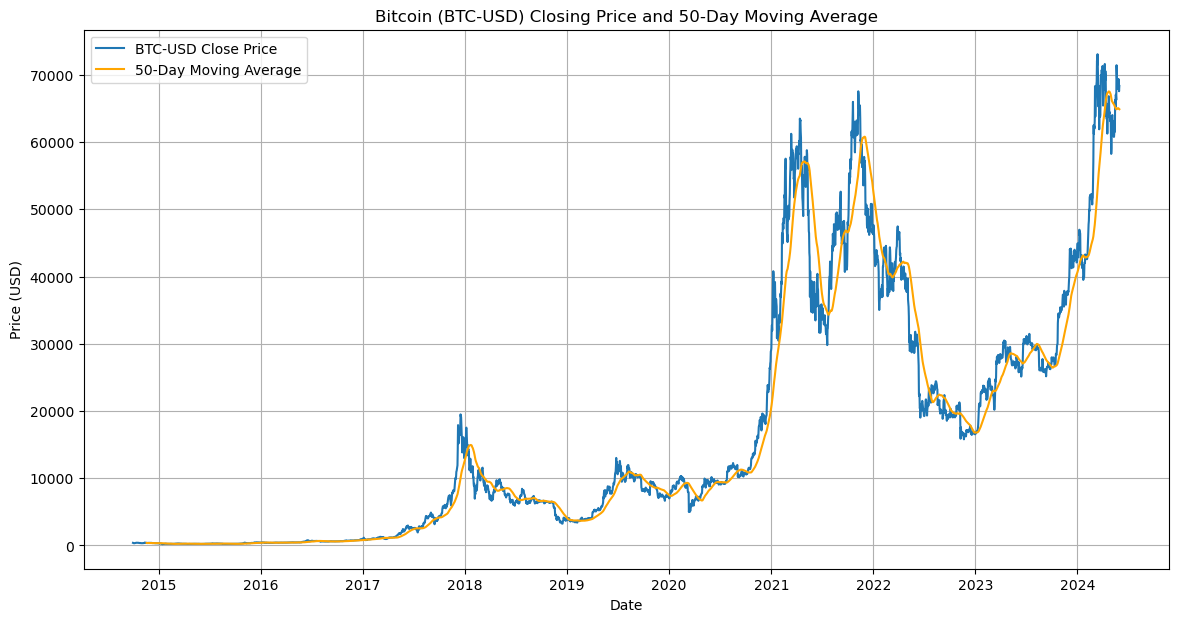

In [7]:
# Calculate and plot the moving average (50-day)
btc_data['50-day MA'] = btc_data['Close'].rolling(window=50).mean()
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC-USD Close Price')
plt.plot(btc_data['50-day MA'], label='50-Day Moving Average', color='orange')
plt.title('Bitcoin (BTC-USD) Closing Price and 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

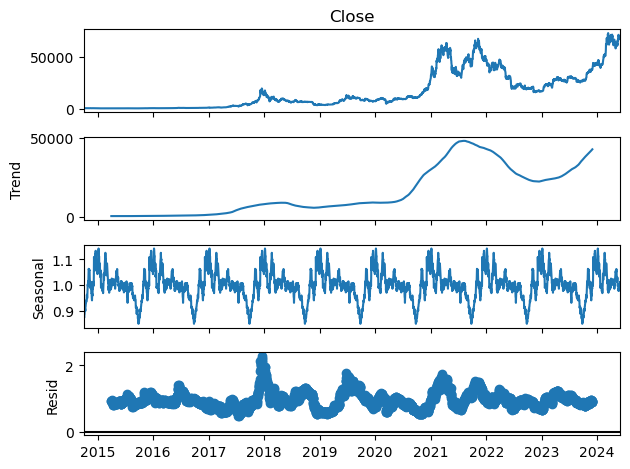

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal Decomposition
result = seasonal_decompose(btc_data['Close'], model='multiplicative', period=365)
result.plot()
plt.show()

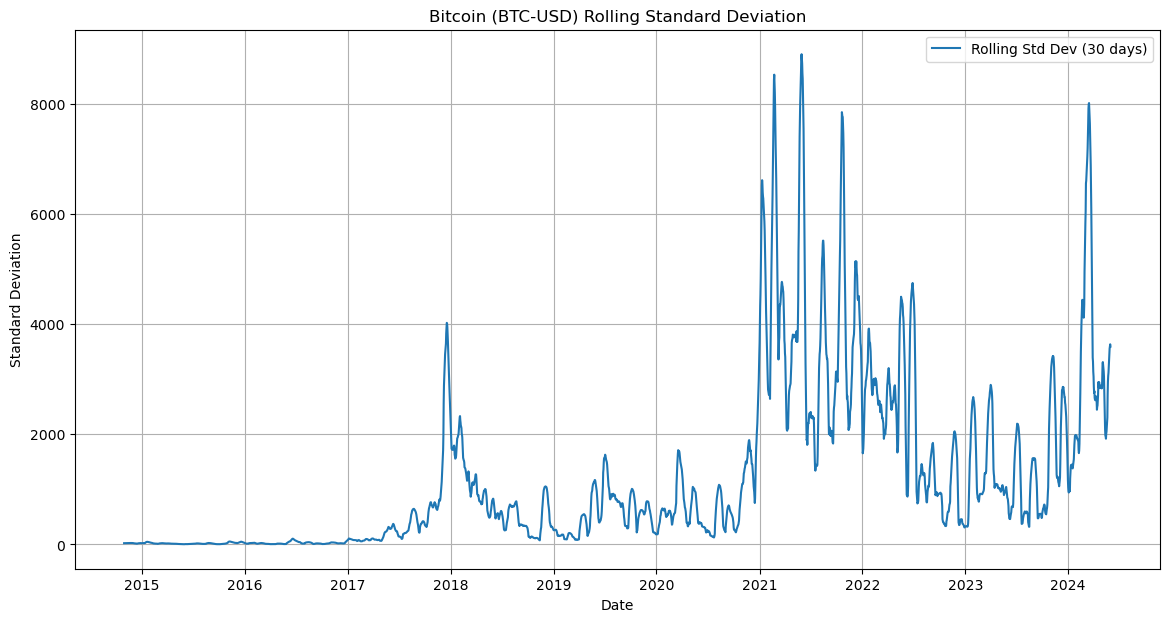

In [9]:
# Calculate rolling standard deviation
btc_data['Rolling Std Dev'] = btc_data['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(btc_data['Rolling Std Dev'], label='Rolling Std Dev (30 days)')
plt.title('Bitcoin (BTC-USD) Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid()
plt.show()

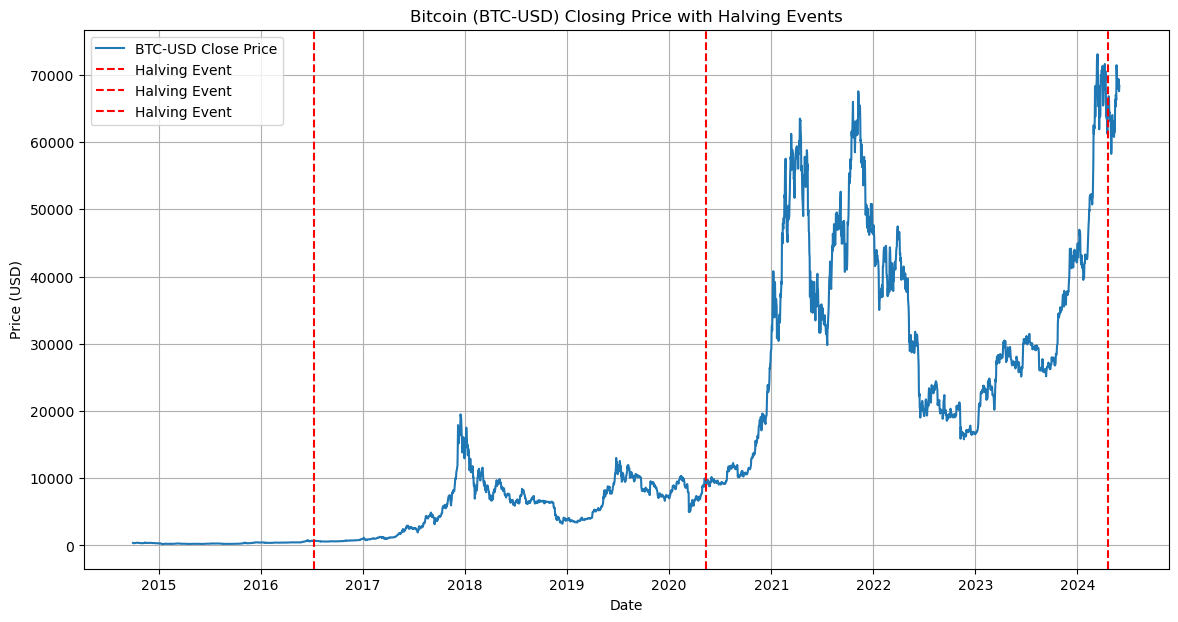

In [10]:
halving_dates = ['2016-07-09', '2020-05-11', '2024-04-19']

plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC-USD Close Price')
for date in halving_dates:
    plt.axvline(pd.to_datetime(date), color='r', linestyle='--', label='Halving Event')
plt.title('Bitcoin (BTC-USD) Closing Price with Halving Events')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

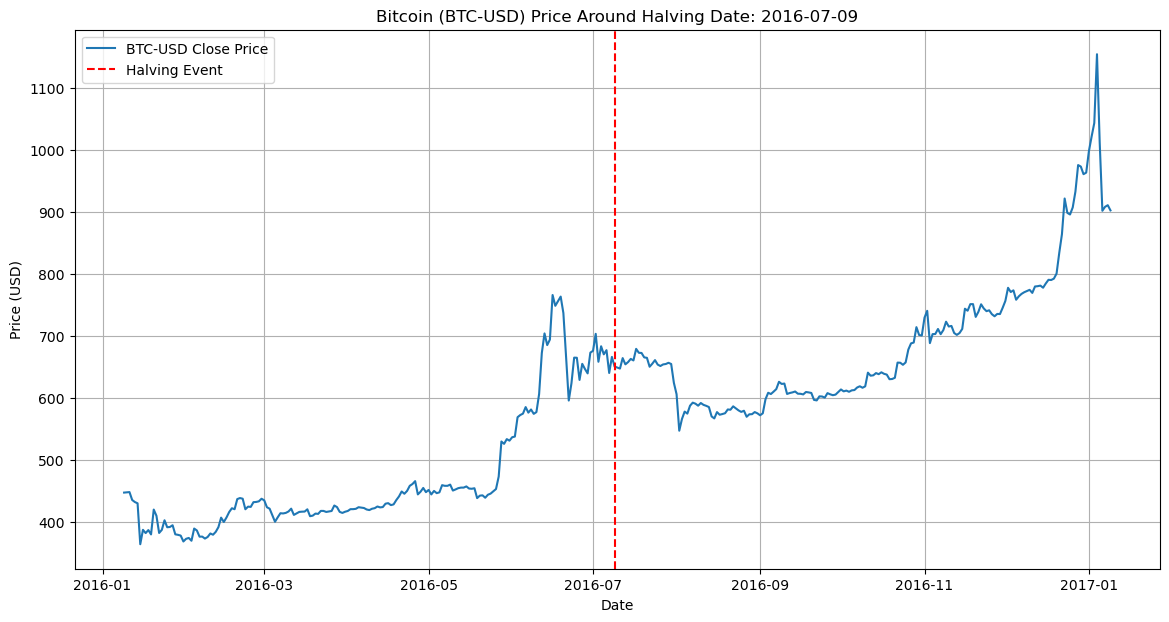

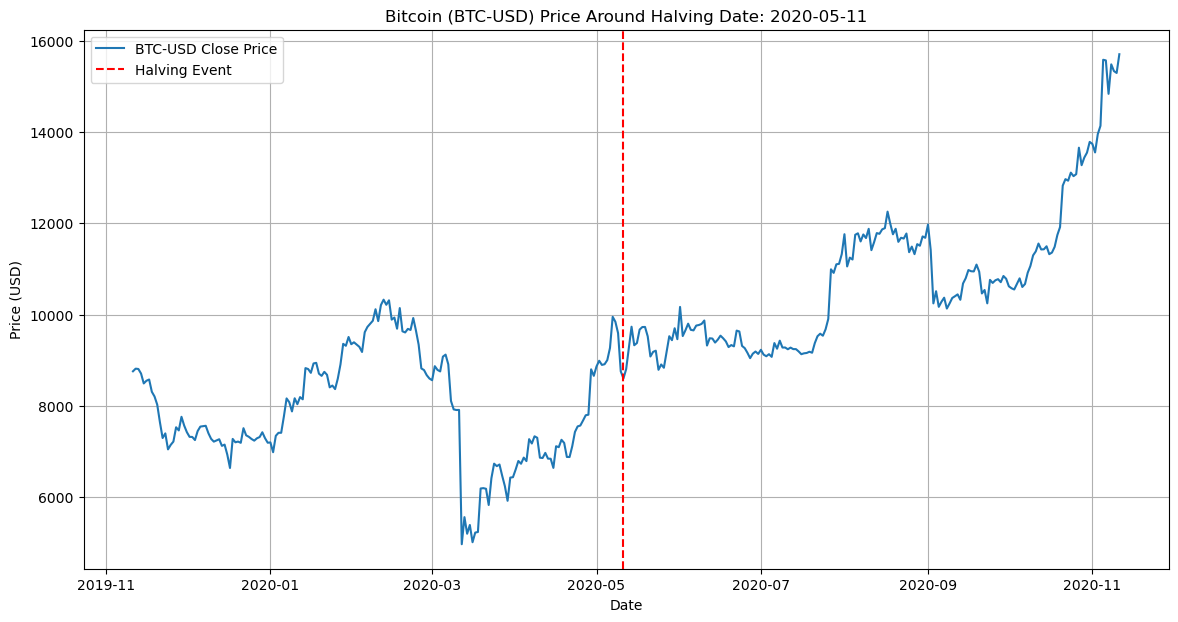

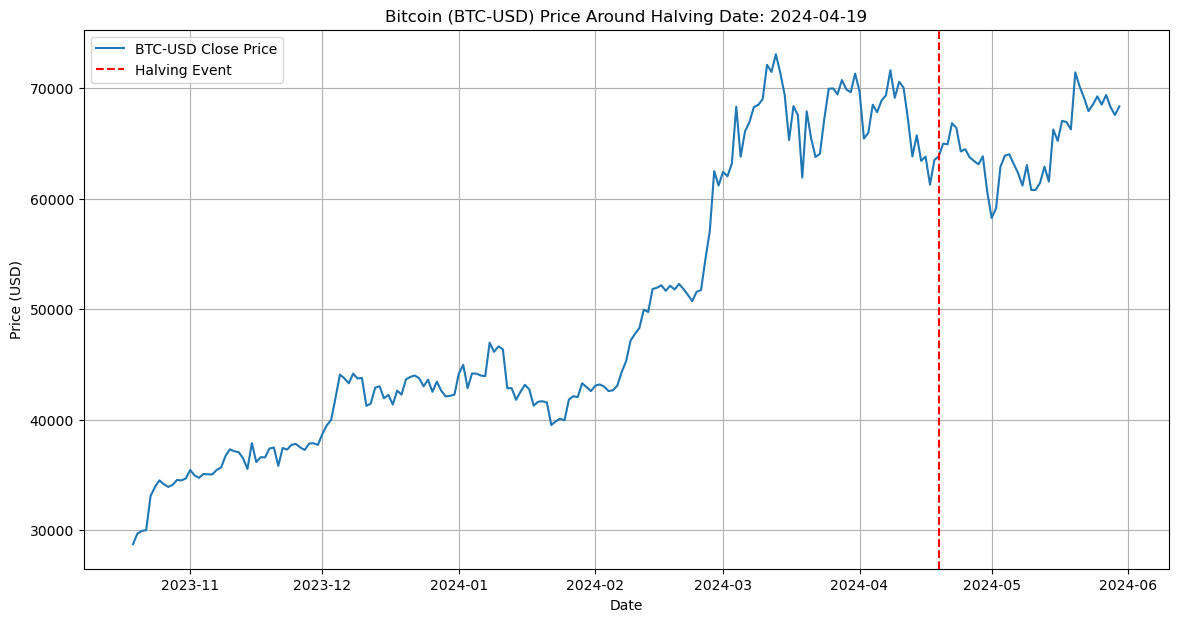

In [11]:
for halving_date in halving_dates:
    halving_date = pd.to_datetime(halving_date)
    start_date = halving_date - pd.DateOffset(months=6)
    end_date = halving_date + pd.DateOffset(months=6)
    halving_period = btc_data.loc[start_date:end_date]
    
    plt.figure(figsize=(14, 7))
    plt.plot(halving_period['Close'], label='BTC-USD Close Price')
    plt.axvline(halving_date, color='r', linestyle='--', label='Halving Event')
    plt.title(f'Bitcoin (BTC-USD) Price Around Halving Date: {halving_date.date()}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

In [12]:
# Correlation matrix
correlation_matrix = btc_data[['Close', 'Volume']].corr()
correlation_matrix

,Close,Volume
Close,1.000000,0.659977
Volume,0.659977,1.000000


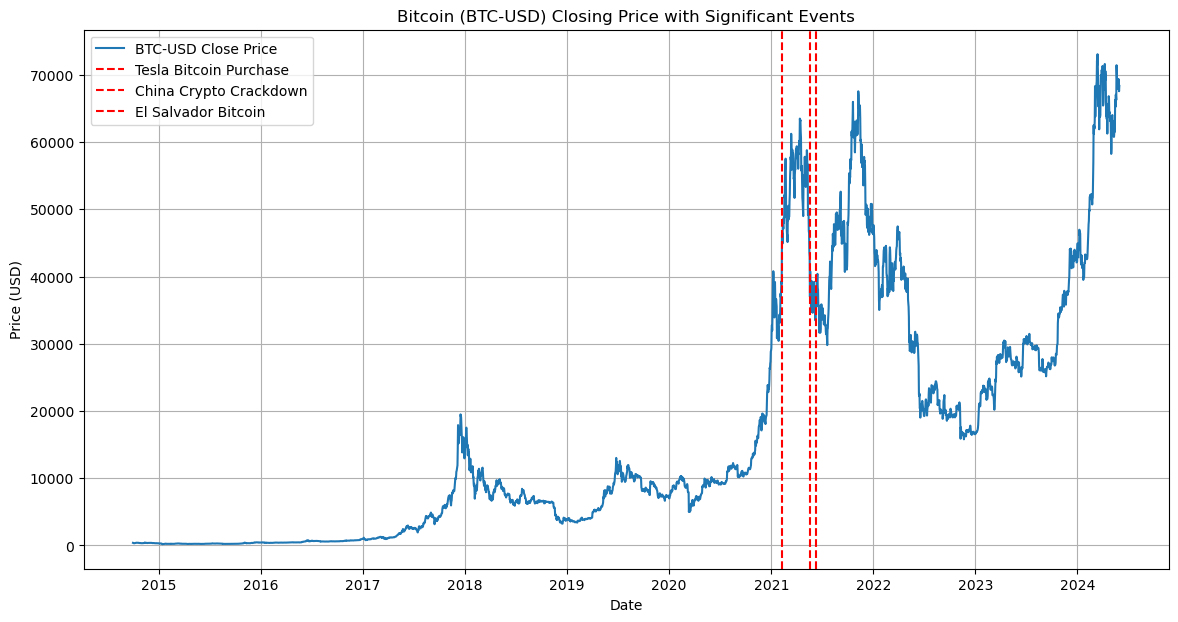

In [13]:
events = {
    'Tesla Bitcoin Purchase': '2021-02-08',
    'China Crypto Crackdown': '2021-05-19',
    'El Salvador Bitcoin': '2021-06-09'
}

# Plot events on the closing price chart
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC-USD Close Price')
for event, date in events.items():
    plt.axvline(pd.to_datetime(date), color='r', linestyle='--', label=event)
plt.title('Bitcoin (BTC-USD) Closing Price with Significant Events')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

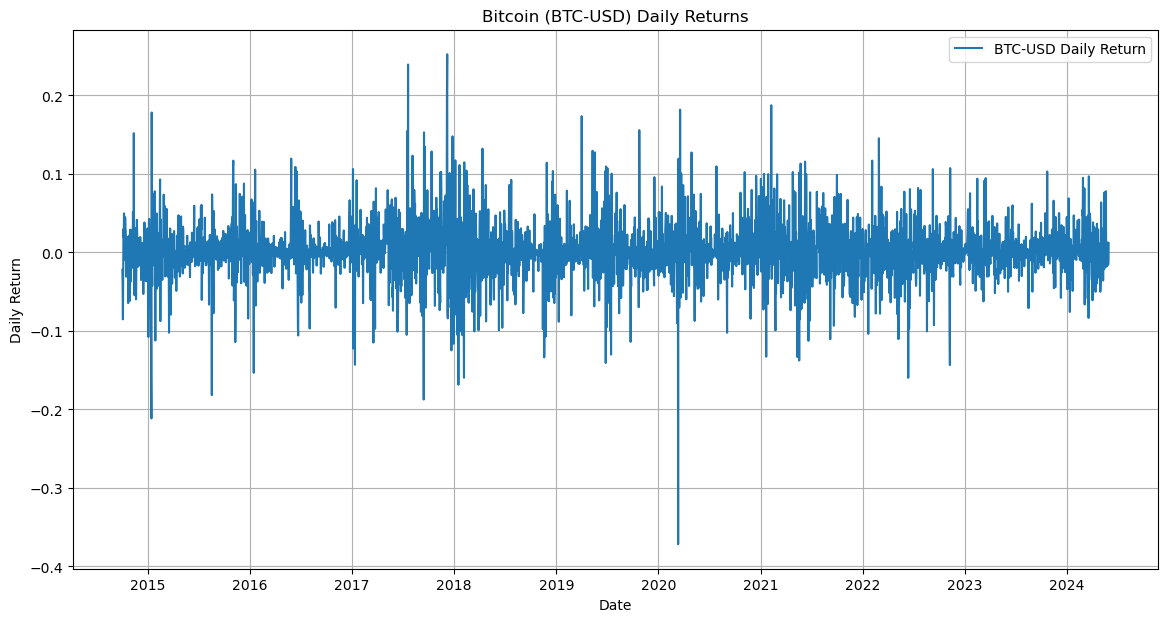

count    3529.000000
mean        0.002149
std         0.036703
min        -0.371695
25%        -0.012413
50%         0.001453
75%         0.017195
max         0.252472
Name: Daily Return, dtype: float64


In [14]:
btc_data['Daily Return'] = btc_data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Daily Return'], label='BTC-USD Daily Return')
plt.title('Bitcoin (BTC-USD) Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid()
plt.show()

# Summary statistics
print(btc_data['Daily Return'].describe())

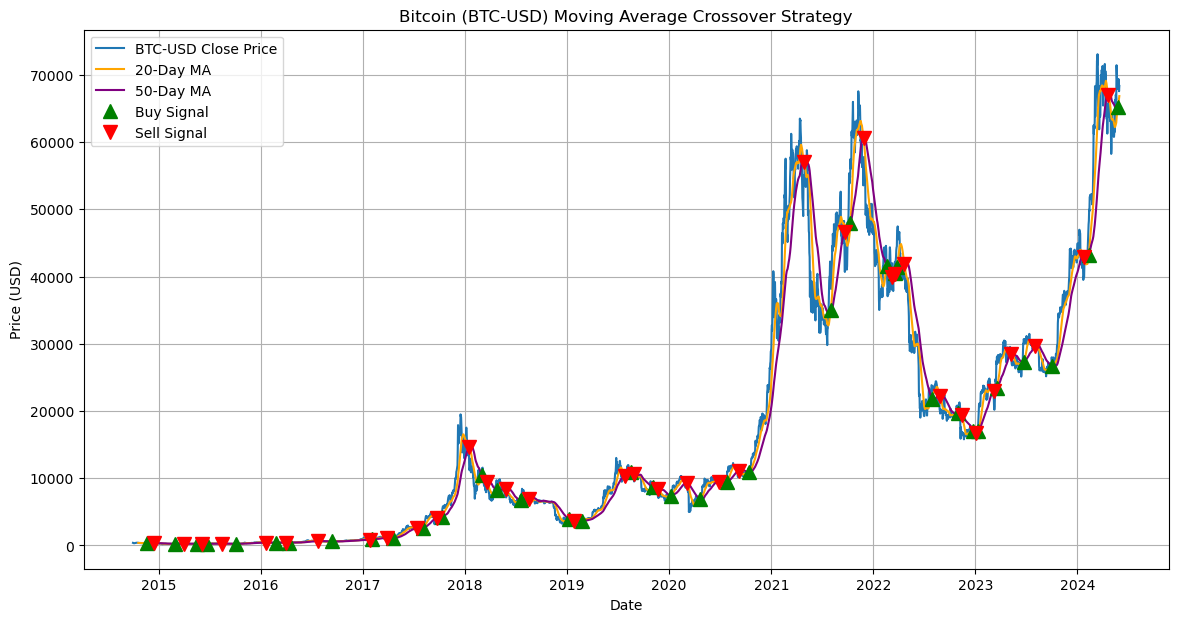

In [15]:
btc_data['Short MA'] = btc_data['Close'].rolling(window=20).mean()
btc_data['Long MA'] = btc_data['Close'].rolling(window=50).mean()

# Buy signal: when Short MA crosses above Long MA
btc_data['Signal'] = 0.0
btc_data['Signal'][20:] = np.where(btc_data['Short MA'][20:] > btc_data['Long MA'][20:], 1.0, 0.0)
btc_data['Position'] = btc_data['Signal'].diff()

# Plot the strategy
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC-USD Close Price')
plt.plot(btc_data['Short MA'], label='20-Day MA', color='orange')
plt.plot(btc_data['Long MA'], label='50-Day MA', color='purple')

plt.plot(btc_data[btc_data['Position'] == 1].index,
         btc_data['Short MA'][btc_data['Position'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

plt.plot(btc_data[btc_data['Position'] == -1].index,
         btc_data['Short MA'][btc_data['Position'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Bitcoin (BTC-USD) Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

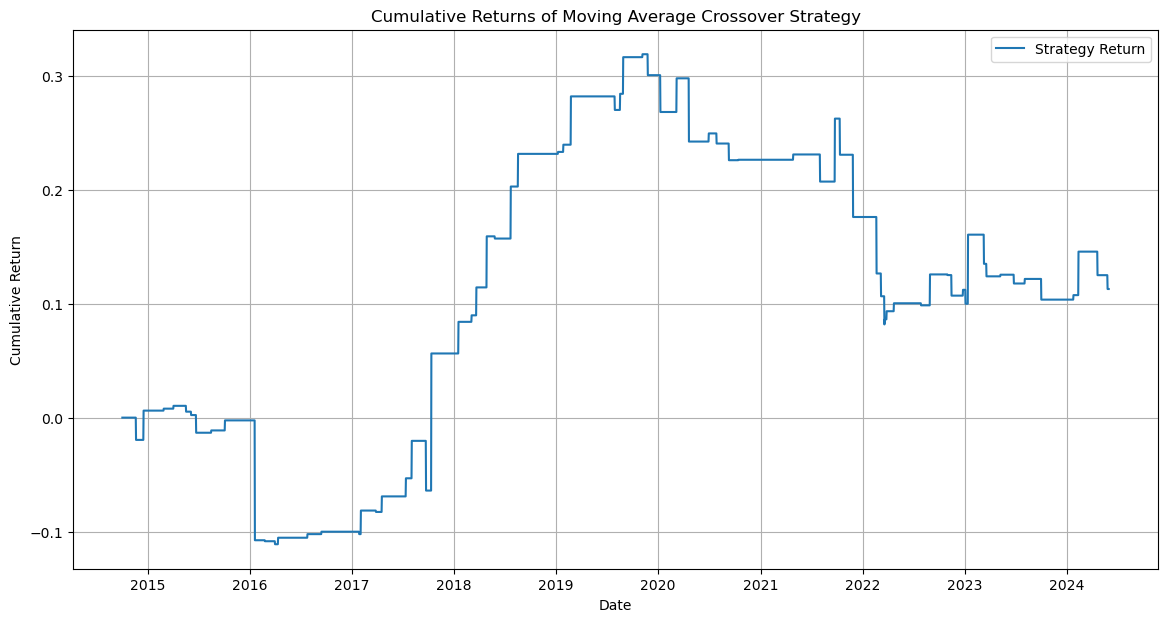

In [16]:
# Calculate strategy returns
btc_data['Strategy Return'] = btc_data['Daily Return'] * btc_data['Position'].shift(1)
cumulative_strategy_returns = (1 + btc_data['Strategy Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_strategy_returns, label='Strategy Return')
plt.title('Cumulative Returns of Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

In [17]:
# Calculate Sharpe Ratio
sharpe_ratio = btc_data['Daily Return'].mean() / btc_data['Daily Return'].std() * np.sqrt(252)
print(f'Sharpe Ratio: {sharpe_ratio:.2f}')

# Calculate Sortino Ratio
negative_returns = btc_data['Daily Return'][btc_data['Daily Return'] < 0]
sortino_ratio = btc_data['Daily Return'].mean() / negative_returns.std() * np.sqrt(252)
print(f'Sortino Ratio: {sortino_ratio:.2f}')

Sharpe Ratio: 0.93
Sortino Ratio: 1.22


### 1. Bitcoin Closing Price Over Time

- **Interpretation**: The closing price of Bitcoin has shown significant volatility over time, with multiple peaks and troughs. There are notable price increases in late 2017, early 2021, and again in late 2023 to early 2024.

### 2. Bitcoin Closing Price and 50-Day Moving Average

- **Interpretation**: The 50-day moving average smooths out short-term fluctuations and highlights longer-term trends. The moving average follows the overall trend of Bitcoin prices, with noticeable lags during rapid price changes. This visualization helps identify longer-term trends and potential reversal points.

### 3. Seasonal Decomposition of Time Series


- **Interpretation**:
  - **Trend**: Shows a long-term increase in Bitcoin prices with significant growth phases and some periods of stagnation.
  - **Seasonal**: Indicates regular patterns within a year, suggesting some seasonal effect on Bitcoin prices.
  - **Residual**: The irregular or random noise component, showing volatility not captured by the trend or seasonal components.

### 4. Rolling Standard Deviation


- **Interpretation**: The rolling standard deviation highlights periods of high volatility, particularly during late 2017, early 2021, and again in late 2023 to early 2024. These periods coincide with significant price increases and corrections.

### 5. Bitcoin Closing Price with Halving Events


- **Interpretation**: The red dashed lines mark the Bitcoin halving events in July 2016, May 2020, and April 2024. These events typically lead to a reduction in the rate at which new bitcoins are created, often followed by increased prices due to reduced supply. The chart shows significant price increases following each halving event.

### 6. Bitcoin Price Around Halving Dates

#### Halving Date: 2016-07-09

- **Interpretation**: Following the 2016 halving, Bitcoin prices showed a strong upward trend, peaking significantly within the following year.

#### Halving Date: 2020-05-11

- **Interpretation**: Post the 2020 halving, Bitcoin prices initially saw some fluctuations but then started a strong upward trend, leading to a significant bull run in early 2021.

#### Halving Date: 2024-04-19

- **Interpretation**: The 2024 halving shows a similar pattern with an initial price increase leading up to the event and further increase post-halving, indicating market optimism and reduced supply effect.

### 7. Correlation Matrix

```plaintext
               Close    Volume
Close     1.000000  0.659977
Volume  0.659977  1.000000
```

- **Interpretation**: There is a moderate positive correlation (0.66) between Bitcoin's closing price and trading volume. This suggests that higher trading volumes are often associated with higher prices, indicating active trading periods may drive price increases.

### 8. Bitcoin Closing Price with Significant Events

- **Tesla Bitcoin Purchase (2021-02-08)**: Following Tesla's announcement of purchasing Bitcoin, there was a significant price spike. This event likely increased investor confidence and drove the price upwards.
- **China Crypto Crackdown (2021-05-19)**: The crackdown led to a sharp drop in Bitcoin prices, highlighting the impact of regulatory news on market sentiment.
- **El Salvador Adopting Bitcoin (2021-06-09)**: El Salvador's adoption of Bitcoin as legal tender initially caused volatility, but the long-term effect contributed to stabilizing and eventually increasing prices.

### 9. Bitcoin Daily Returns

- **Daily Return Statistics**:
  - **Mean**: 0.002149, indicating an average daily return of about 0.21%.
  - **Standard Deviation**: 0.036703, showing high volatility.
  - **Min/Max**: -0.371695 to 0.252472, demonstrating the wide range of daily returns, including significant negative and positive spikes.

### 10. Moving Average Crossover Strategy

- **Signals**:
  - **Buy Signals (Green Triangles)**: When the short-term (20-day) moving average crosses above the long-term (50-day) moving average.
  - **Sell Signals (Red Triangles)**: When the short-term moving average crosses below the long-term moving average.
  
- **Interpretation**: The moving average crossover strategy generates frequent buy and sell signals. This strategy might capture trends, but also results in many false signals during periods of price consolidation.

### 11. Cumulative Returns of Moving Average Crossover Strategy

- **Interpretation**: The strategy shows positive cumulative returns, particularly during strong uptrend periods (e.g., late 2017 and early 2021). However, it also demonstrates periods of stagnation and drawdown, indicating that while the strategy can be profitable, it also carries risks.

### 12. Risk-Adjusted Returns

```plaintext
Sharpe Ratio: 0.93
Sortino Ratio: 1.22
```

- **Sharpe Ratio**: 
  - **Interpretation**: A Sharpe ratio of 0.93 suggests that Bitcoin has provided returns nearly equivalent to its risk level. This is a moderate risk-adjusted return, indicating that while the returns are reasonable, they are accompanied by significant volatility.
  
- **Sortino Ratio**:
  - **Interpretation**: A Sortino ratio of 1.22 is higher than the Sharpe ratio, indicating that the downside risk (negative returns) is somewhat lower than the overall volatility. This suggests that Bitcoin has provided better risk-adjusted returns when focusing only on downside risk.

### Recommendations

1. **Volatility**: Bitcoin shows high volatility, with periods of significant price increases and corrections. Investors should be aware of this volatility and consider it in their risk management strategies.

2. **Halving Events**: Each halving event has historically been followed by significant price increases. This suggests that upcoming halving events could be good entry points for long-term investments.

3. **Seasonality**: There appears to be a seasonal component to Bitcoin prices, which could be leveraged for short-term trading strategies.

4. **Correlation with Volume**: The moderate correlation between price and volume suggests that monitoring trading volume could provide insights into potential price movements.

5. **Trend Analysis**: The long-term trend is upward, but with significant fluctuations. A long-term investment approach might be more suitable, considering the overall upward trajectory.

6. **Impact of Events**:
   - Major announcements (e.g., Tesla's purchase) and regulatory actions (e.g., China's crackdown) significantly impact Bitcoin prices.
   - Positive events generally lead to price spikes, while negative events cause sharp declines.

7. **Volatility**:
   - Bitcoin exhibits high volatility with significant daily return fluctuations. Investors should be prepared for large price swings and manage their risk accordingly.

8. **Investment Strategy**:
   - The moving average crossover strategy can be profitable, particularly in trending markets. However, it generates frequent signals and may not perform well during sideways markets.
   - Investors using this strategy should consider additional filters to reduce false signals and enhance performance.

9. **Risk-Adjusted Returns**:
   - The Sharpe and Sortino ratios indicate that Bitcoin provides moderate risk-adjusted returns. While the potential for high returns exists, the associated risk is significant.
   - The Sortino ratio suggests better performance when considering downside risk, making Bitcoin a viable option for risk-tolerant investors seeking high returns.


# Modelling
## a) LSTM

In [18]:
EPOCHS = 10
BATCH_SIZE = 32
INPUT_WINDOW = 60
TRAIN_DATA_SIZE = 0.8
NORMALIZATION_RANGE = (0, 1)

In [19]:
# Importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

# Normalize the data
scaler = MinMaxScaler(feature_range=NORMALIZATION_RANGE)
btc_data['Normalized_Close'] = scaler.fit_transform(btc_data[['Close']])
btc_data['Normalized_Close'].head()

Date
2014-10-01    0.002819
2014-10-02    0.002702
2014-10-03    0.002488
2014-10-04    0.002068
2014-10-05    0.001953
Name: Normalized_Close, dtype: float64

In [20]:
# Creating sequences of data
def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(window_size, len(data)):
        sequences.append(data[i-window_size:i])
        labels.append(data[i])
    return np.array(sequences), np.array(labels)

window_size = INPUT_WINDOW
sequences, labels = create_sequences(btc_data['Normalized_Close'].values, window_size)

In [21]:
# Spliting the data into training and testing sets
split = int(TRAIN_DATA_SIZE * len(sequences))
X_train, X_test = sequences[:split], sequences[split:]
y_train, y_test = labels[:split], labels[split:]

# Reshape data for LSTM model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (2776, 60, 1), y_train shape: (2776,)
X_test shape: (694, 60, 1), y_test shape: (694,)


In [22]:
# Model Building and Training
def create_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation="linear"))
    return model

model = create_lstm((X_train.shape[1], 1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compiling and training model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mae", "mse"])
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
87/87 - 5s - 53ms/step - loss: 0.0057 - mae: 0.0378 - mse: 0.0057 - val_loss: 0.0013 - val_mae: 0.0234 - val_mse: 0.0013
Epoch 2/10
87/87 - 3s - 30ms/step - loss: 0.0018 - mae: 0.0227 - mse: 0.0018 - val_loss: 0.0014 - val_mae: 0.0325 - val_mse: 0.0014
Epoch 3/10
87/87 - 3s - 31ms/step - loss: 0.0014 - mae: 0.0197 - mse: 0.0014 - val_loss: 9.1629e-04 - val_mae: 0.0241 - val_mse: 9.1629e-04
Epoch 4/10
87/87 - 3s - 31ms/step - loss: 0.0013 - mae: 0.0202 - mse: 0.0013 - val_loss: 9.7486e-04 - val_mae: 0.0204 - val_mse: 9.7486e-04
Epoch 5/10
87/87 - 3s - 31ms/step - loss: 0.0014 - mae: 0.0204 - mse: 0.0014 - val_loss: 0.0010 - val_mae: 0.0204 - val_mse: 0.0010
Epoch 6/10
87/87 - 3s - 31ms/step - loss: 0.0012 - mae: 0.0185 - mse: 0.0012 - val_loss: 0.0015 - val_mae: 0.0255 - val_mse: 0.0015
Epoch 7/10
87/87 - 3s - 31ms/step - loss: 0.0011 - mae: 0.0183 - mse: 0.0011 - val_loss: 6.8882e-04 - val_mae: 0.0195 - val_mse: 6.8882e-04
Epoch 8/10
87/87 - 3s - 31ms/step - loss: 0.0011 - m

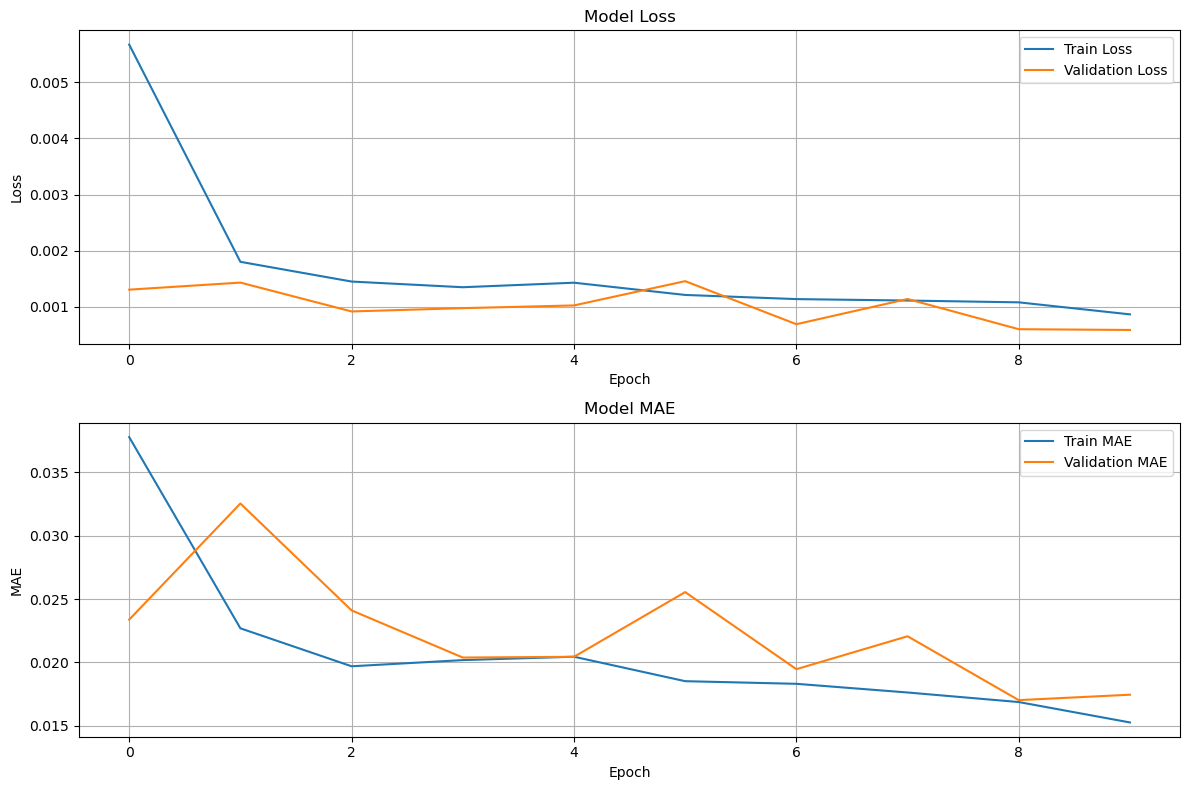

In [24]:
# Plotting the training history
def plot_history(history):
    plt.figure(figsize=(12, 8))
    
    # Plot training & validation loss values
    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid()
    
    # Plot training & validation MAE values
    plt.subplot(2, 1, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

plot_history(history)

MSE: 3117301.0959
MAE: 1272.3051
RMSE: 1765.5880
R2 Score: 0.9869


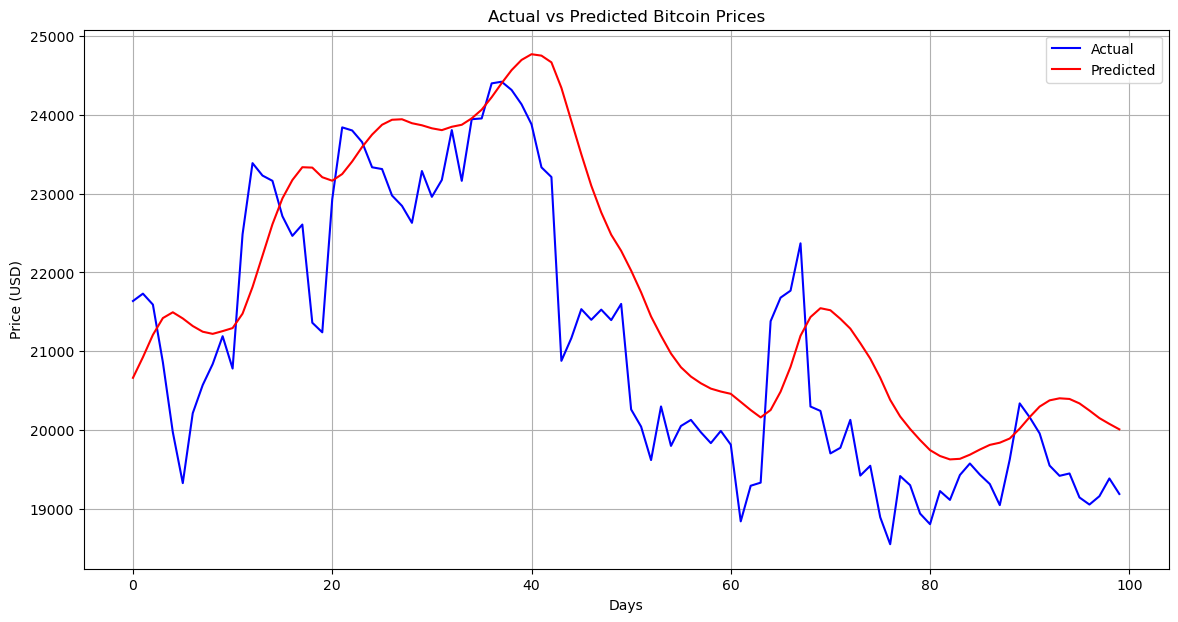

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(actual, predicted):
    # Calculate evaluation metrics
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    
    # Print the evaluation metrics
    print(f'MSE: {mse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R2 Score: {r2:.4f}')
    
    # Plot actual vs predicted values
    plt.figure(figsize=(14, 7))
    plt.plot(actual[:100], label='Actual', color='blue')
    plt.plot(predicted[1:101], label='Predicted', color='red')
    plt.title('Actual vs Predicted Bitcoin Prices')
    plt.xlabel('Days')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

# Making predictions
predicted = model.predict(X_test, verbose=0)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluating the model
evaluate_model(actual, predicted)

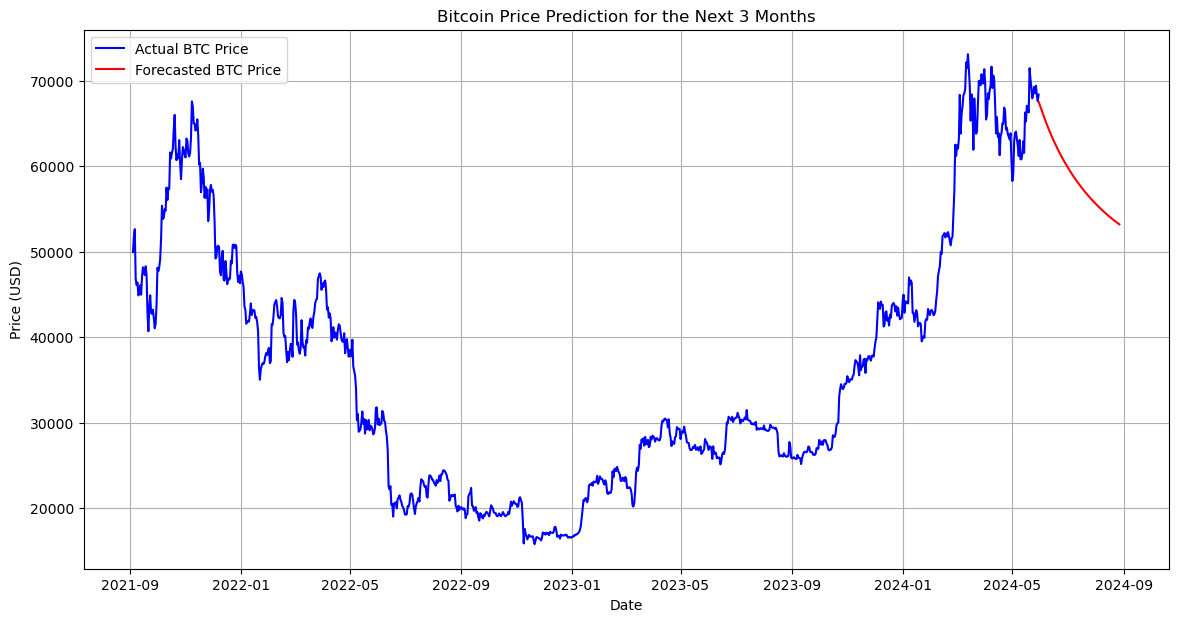

In [26]:
def forecast(data, model, sequences, labels, EPOCHS, BATCH_SIZE, days_to_forecast=90):

    # Reshape data for LSTM model
    X_all = sequences.reshape((sequences.shape[0], sequences.shape[1], 1))
    y_all = labels

    # Retrain the model on all data
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mae", "mse"])
    model.fit(X_all, y_all, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

    # Making Forecast
    forecast = []
    current_sequence = data[-window_size:]
    
    for _ in range(days_to_forecast):
        predicted = model.predict(current_sequence.reshape((1, window_size, 1)), verbose=0)[0, 0]
        forecast.append(predicted)
        current_sequence = np.append(current_sequence[1:], predicted)

    # Denormalizing prediction
    forecasted_normalized = np.array(forecast)
    forecasted_prices = scaler.inverse_transform(forecasted_normalized.reshape(-1, 1))
    forecasted_prices = [i[0] for i in forecasted_prices]
    forecasted_index = pd.date_range(start=btc_data.index[-1], periods=days_to_forecast)

    last_data = btc_data.tail(1000)
    # Plotting the actual data along with the forecasted data
    plt.figure(figsize=(14, 7))
    plt.plot(last_data.index, last_data['Close'], label='Actual BTC Price', color='blue')
    plt.plot(forecasted_index, forecasted_prices, label='Forecasted BTC Price', color='red')
    plt.title(f"Bitcoin Price Prediction for the Next {days_to_forecast//30} Months")
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

model = create_lstm((X_train.shape[1], 1))
forecast(btc_data['Normalized_Close'].values, model, sequences, labels, EPOCHS, BATCH_SIZE, 90)

## b) GRU

In [27]:
from tensorflow.keras.layers import GRU, Dense

# Model Building and Training
def create_gru(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation="linear"))
    return model

model_gru = create_gru((X_train.shape[1], 1))
model_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 60, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compiling and training model
model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=["mae", "mse"])
history_gru = model_gru.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0203 - mae: 0.0822 - mse: 0.0203 - val_loss: 4.7273e-04 - val_mae: 0.0140 - val_mse: 4.7273e-04
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0014 - mae: 0.0194 - mse: 0.0014 - val_loss: 3.8614e-04 - val_mae: 0.0132 - val_mse: 3.8614e-04
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0011 - mae: 0.0181 - mse: 0.0011 - val_loss: 0.0027 - val_mae: 0.0441 - val_mse: 0.0027
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0013 - mae: 0.0220 - mse: 0.0013 - val_loss: 4.7516e-04 - val_mae: 0.0138 - val_mse: 4.7516e-04
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 7.9594e-04 - mae: 0.0161 - mse: 7.9594e-04 - val_loss: 8.2196e-04 - val_mae: 0.0218 - val_mse: 8.2196e-04
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 8.8397e-04 - mae: 0.0159 - mse: 8.8397e-04 - val_loss: 3.4126e-04 - val_mae: 0.0127 - val_mse: 3.4126e-04
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step

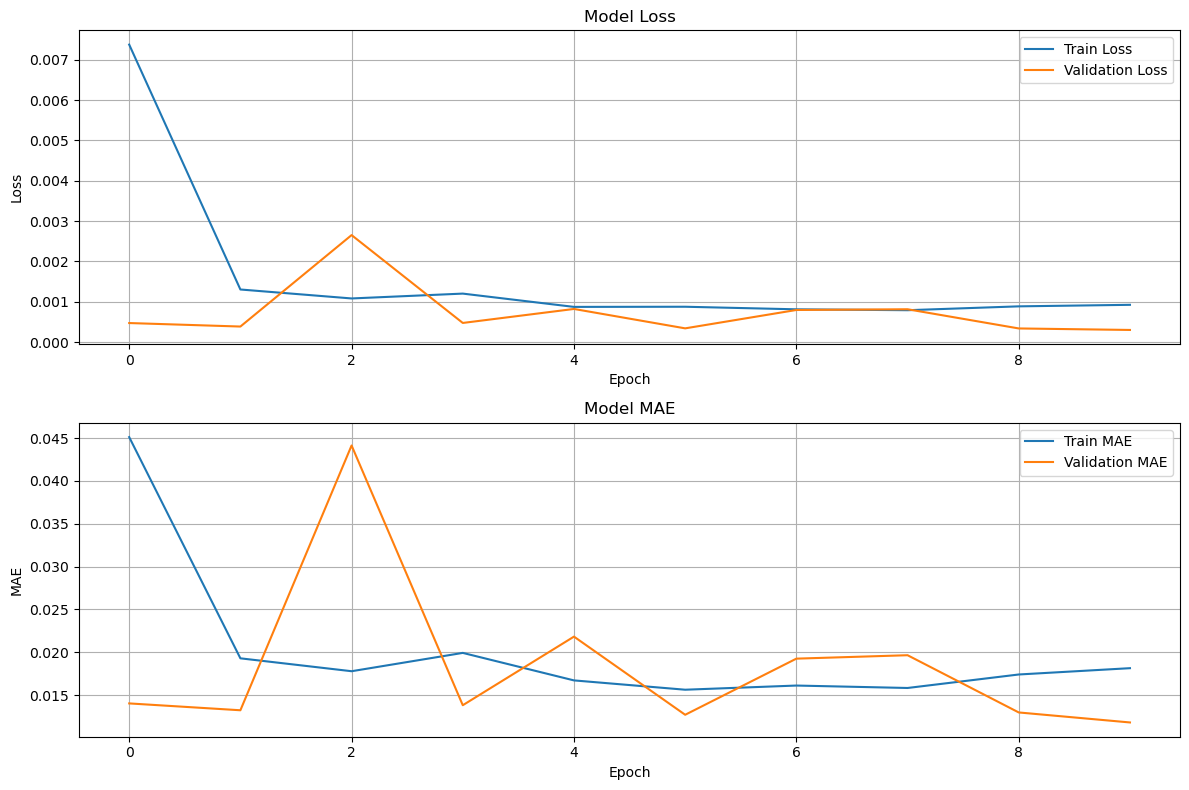

In [29]:
plot_history(history_gru)

MSE: 1602719.0840
MAE: 861.0804
RMSE: 1265.9854
R2 Score: 0.9933


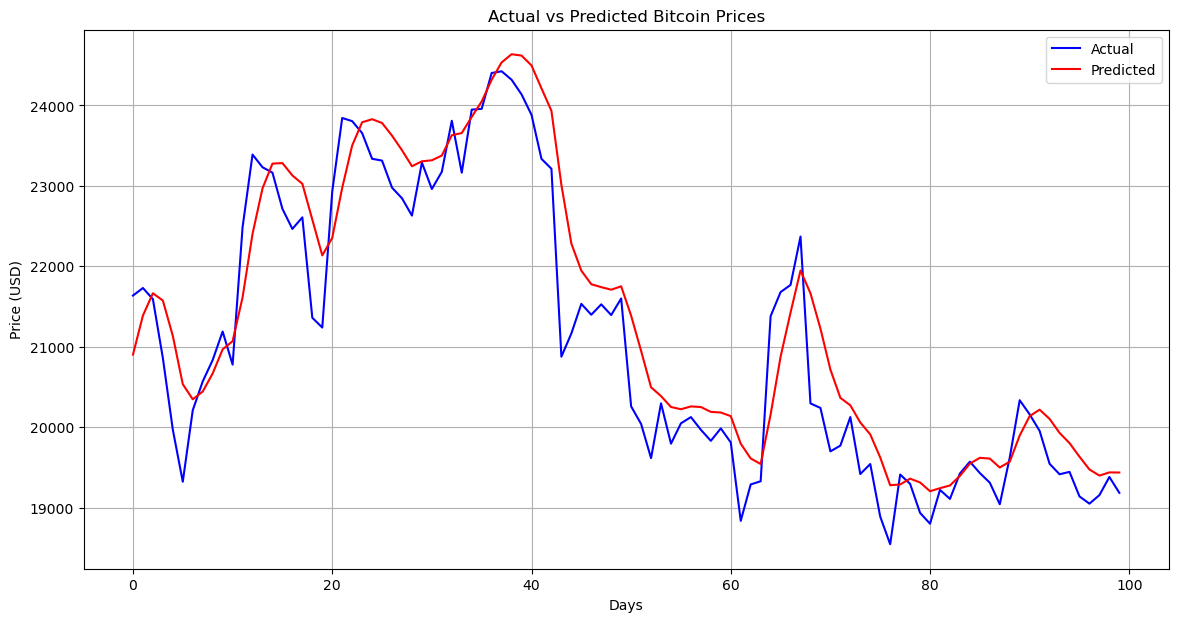

In [30]:
# Making predictions
predicted = model_gru.predict(X_test, verbose=0)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluating the model
evaluate_model(actual, predicted)

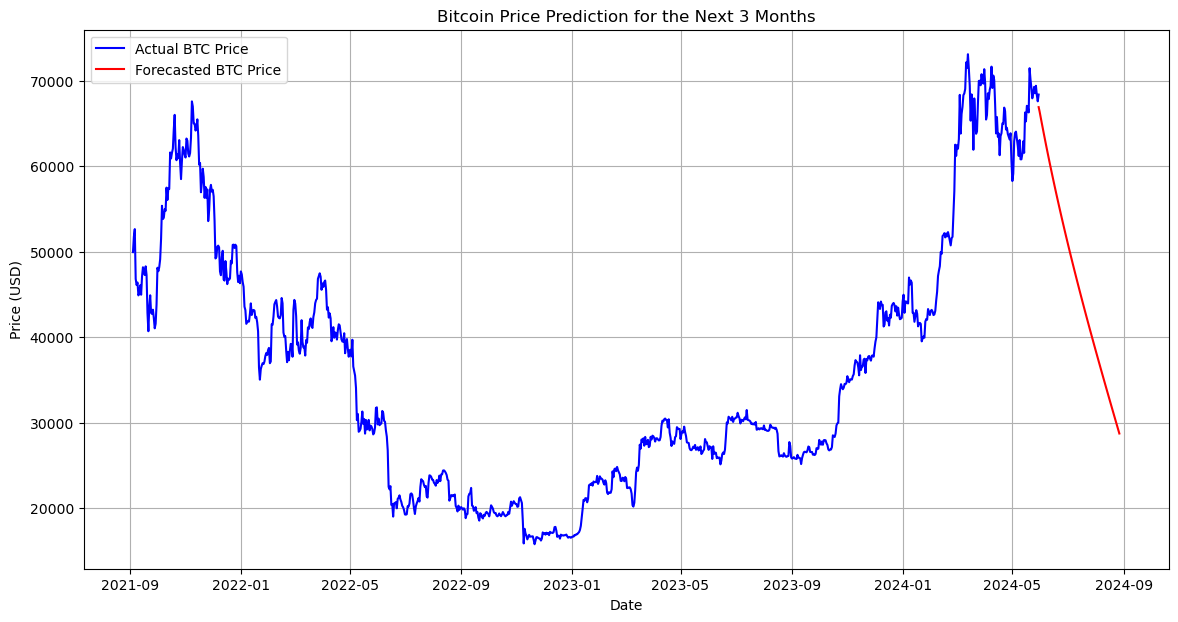

In [31]:
# Forecasting
model_gru = create_gru((X_train.shape[1], 1))
forecast(btc_data['Normalized_Close'].values, model_gru, sequences, labels, EPOCHS, BATCH_SIZE, 90)

## c) Prophet

In [32]:
# Prepare the data for Prophet
prophet_data = btc_data.reset_index()[['Date', 'Close']]
prophet_data.columns = ['ds', 'y']

In [33]:
from prophet import Prophet

# Initialize and train the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

16:24:36 - cmdstanpy - INFO - Chain [1] start processing
16:24:37 - cmdstanpy - INFO - Chain [1] done processing


16:24:37 - cmdstanpy - INFO - Chain [1] start processing
16:24:37 - cmdstanpy - INFO - Chain [1] done processing


MSE: 669905980.2911
MAE: 24057.9886
RMSE: 25882.5420
R2 Score: -1.8246


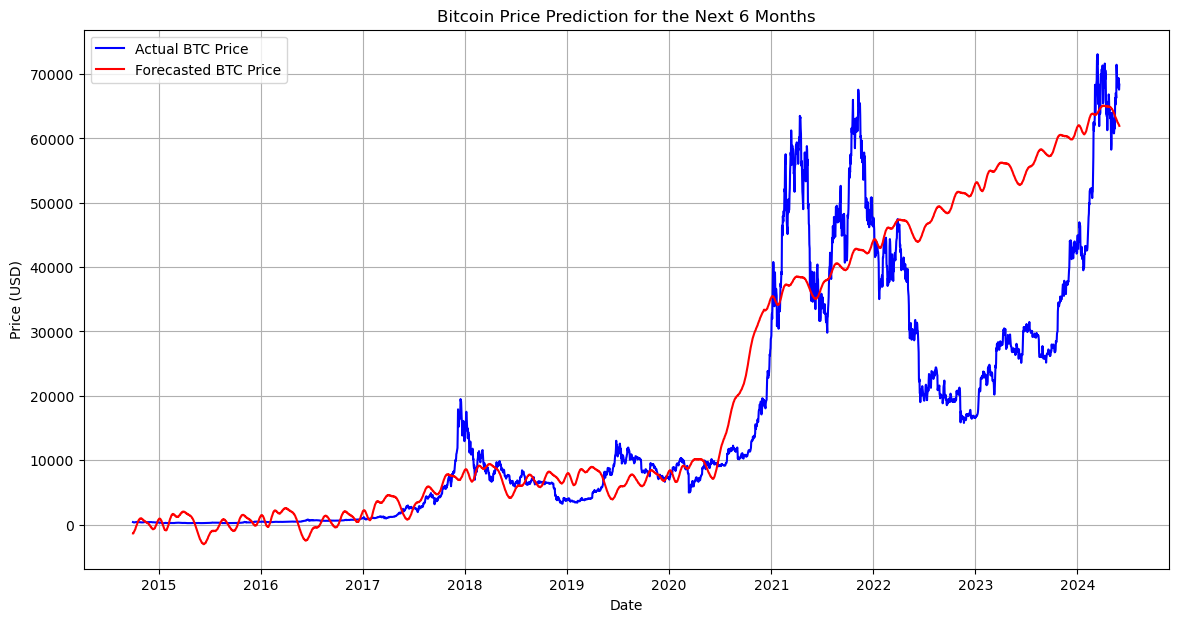

In [34]:
# Split the data into training and validation sets
train_size = int(0.8 * len(prophet_data))
train_data = prophet_data[:train_size]
validation_data = prophet_data[train_size:]

# Fit the model on the training data
prophet_model = Prophet()
prophet_model.fit(train_data)

# Make predictions on the validation data
future = prophet_model.make_future_dataframe(periods=len(validation_data))
forecast = prophet_model.predict(future)

# Extract the predicted values for the validation period
validation_forecast = forecast['yhat'][-len(validation_data):].values
actual_values = validation_data['y'].values

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)
    
    print(f'MSE: {mse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R2 Score: {r2:.4f}')

evaluate_model(actual_values, validation_forecast)

future = prophet_model.make_future_dataframe(periods=706)
forecast = prophet_model.predict(future)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual BTC Price', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted BTC Price', color='red')
plt.title('Bitcoin Price Prediction for the Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

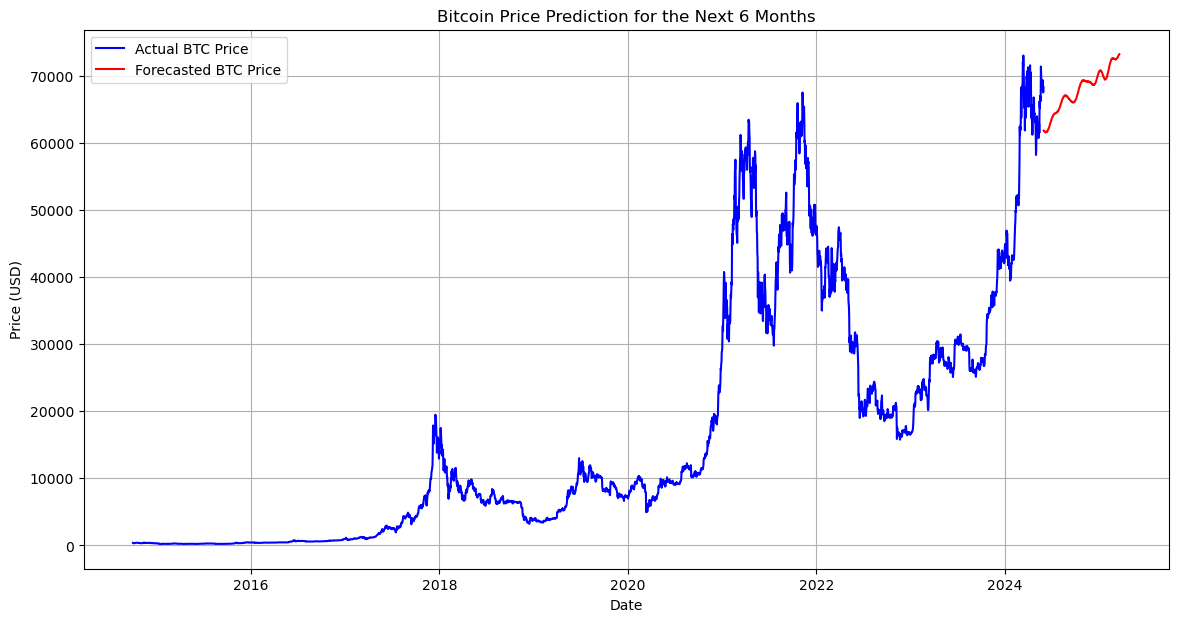

In [36]:
# Forecast for the next 6 months
future = prophet_model.make_future_dataframe(periods=1000)
future = future[future["ds"]>pd.to_datetime("2024-05-30")]
forecast = prophet_model.predict(future)

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual BTC Price', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted BTC Price', color='red')
plt.title('Bitcoin Price Prediction for the Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()